# Milestone I

## Brain cancer gene expression - CuMiDa

Zbiór danych zawiera 130 próbek z danymi na temat ekspresji genów u pacjentów z różnymi typami raka mózgu. Zawiera informacje na temat tego, które z badanych genów są najbardziej aktywne wśród tych pacjentów.

## Cel biznesowy

Naszym celem biznesowym jest optymalizacja projektów badań klinicznych. Próbki z podobnym profilem mogą reagować na leczenie w podobny sposób.
Dzięki klasteryzacji będziemy w stanie wyłonić grupy pacjentów o zbliżonych genach, co stworzy bardziej jednorodną grupę do badania i zwiększy szanse powodzenia próby klinicznej.
Tym sposobem obniżymy czas i koszty badań klinicznych.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/Robert/Downloads/archive (2)/Brain_GSE50161.csv")


In [2]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


## mini EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 54.2+ MB


In [4]:
df.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,898.500000,12.276393,8.769583,7.722634,9.160209,4.842069,7.968388,6.800111,6.472452,6.068968,...,12.371075,11.812911,13.793913,13.619041,5.206208,4.811666,3.916795,3.701539,4.627912,4.633377
std,37.671829,0.790160,0.673396,1.037339,0.615369,0.922003,0.630260,0.537431,0.659847,0.904152,...,0.609813,0.618190,0.320124,0.309078,0.220767,0.219851,0.165917,0.180251,0.160663,0.192353
min,834.000000,10.156207,6.627878,6.222515,8.044421,3.682762,6.560920,5.910571,5.515079,4.491771,...,9.979005,9.926470,12.719785,12.777792,4.680072,4.247758,3.530287,3.432622,4.278812,4.050006
25%,866.250000,11.679721,8.378760,7.007678,8.595505,4.207043,7.533713,6.389605,5.935051,5.462356,...,12.056825,11.359850,13.605871,13.392790,5.031176,4.684169,3.807447,3.589381,4.530391,4.519694
50%,898.500000,12.502518,8.786242,7.521674,9.194487,4.462729,7.915062,6.654785,6.401447,5.856087,...,12.415320,11.768853,13.774338,13.614493,5.214618,4.785318,3.912025,3.674620,4.607167,4.603287
75%,930.750000,12.883374,9.211098,8.249157,9.707397,5.276685,8.385912,7.143818,6.985782,6.476124,...,12.757924,12.230375,13.969533,13.813191,5.324326,4.950025,4.009166,3.744824,4.718997,4.736634
max,963.000000,13.655639,10.716003,12.054143,10.407136,7.404503,10.164655,8.110006,8.812959,8.646862,...,13.480002,13.022222,14.476079,14.273778,5.904952,5.619512,4.547821,4.854368,5.420217,5.436919


In [5]:
df.shape

(130, 54677)

In [6]:
df.isna().sum().sum()

0

Nie ma braków w danych.

Text(0, 0.5, 'Liczba próbek')

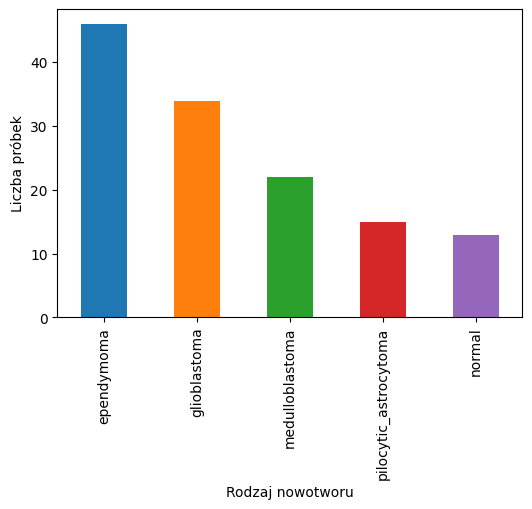

In [7]:
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind="bar", color=sns.color_palette(n_colors=len(df['type'].unique())))
plt.xlabel("Rodzaj nowotworu")
plt.ylabel("Liczba próbek")

Usuwamy kolumnę ze zmienną klasyfikującą "type" i "samples".

In [8]:
df = df.drop('type', axis=1)
df = df.drop('samples', axis=1)

df, df_validation = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
df.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
70,12.381536,9.282545,9.671043,8.224457,6.017184,8.597751,6.273210,5.767105,7.069769,4.946979,...,12.255144,11.703560,13.924516,13.473175,4.883626,4.461374,3.818766,3.669596,4.598878,4.470067
78,12.765997,9.581127,8.322197,9.222665,4.006617,8.914098,6.512082,5.569699,5.805724,5.266946,...,11.880243,11.385517,13.608261,13.339720,4.835959,4.454063,3.860405,3.536494,4.555298,4.420267
47,12.111837,9.909101,8.590495,9.590659,4.558298,7.089286,6.925450,6.184260,5.697576,5.254970,...,12.441392,12.124897,13.796883,13.713140,5.405370,4.971722,3.972822,3.713295,4.540301,4.547086
0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
12,12.545334,8.413482,7.250554,10.100683,4.296262,8.197189,6.471832,7.343579,4.702028,5.259024,...,11.379007,10.832814,13.806885,13.923223,5.167044,4.982530,3.964289,3.512302,4.552102,4.553857


# PCA

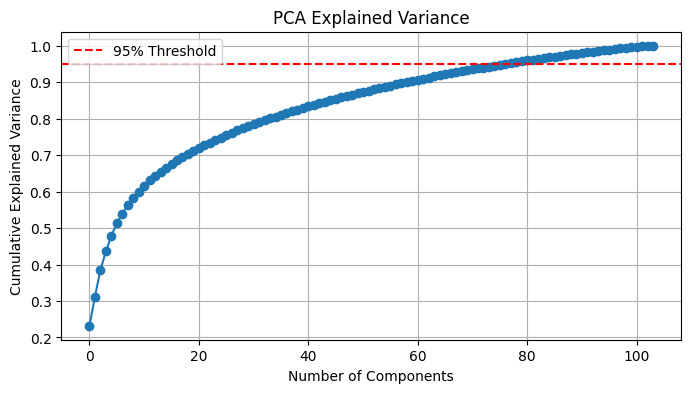

In [10]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standaryzujemy dane 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Nakładamy PCA
pca = PCA(random_state=12).fit(df_scaled)
explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 4))
plt.plot(explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.show()

Aby zachować ~95% wariancji zachowujemy 75 cech

In [11]:
pca = PCA(n_components=75, random_state=12).fit(df_scaled)

df_pca = pca.transform(df_scaled)

In [12]:
df_pca

array([[-161.16551403,  -51.1421321 ,   25.79518215, ...,  -16.83016707,
           0.75505736,    4.34449061],
       [-132.26456334,  -26.35943062,   18.76629717, ...,   14.78791936,
         -30.93305905,   11.30959566],
       [ 100.6762399 ,   13.75465812,   81.09998312, ...,  -24.34208992,
         -16.99719783,   -1.91125267],
       ...,
       [  92.25392208,  -80.37476193,  -16.16609794, ...,   -4.00810526,
         -12.06710462,  -10.09071486],
       [-128.04932871,   66.5785427 ,  140.03261276, ...,    0.5282046 ,
          -2.60662257,    1.2971054 ],
       [ -30.85085072,  129.41216001,   52.29437402, ...,    5.90408072,
          -3.03691396,    7.53440587]])

# TSNE on lower dimensional data

In [13]:
from sklearn.manifold import TSNE

df_tSNE = TSNE(n_components=2, perplexity=10, random_state=12).fit_transform(df_pca)

Uwaga na outliery: jeśli robimy kmeans to trzeba najperw zrobić cutoffy na zmiennych, bo jest bardzo wrażliwa. Tutaj raczej outlierów nie widać.

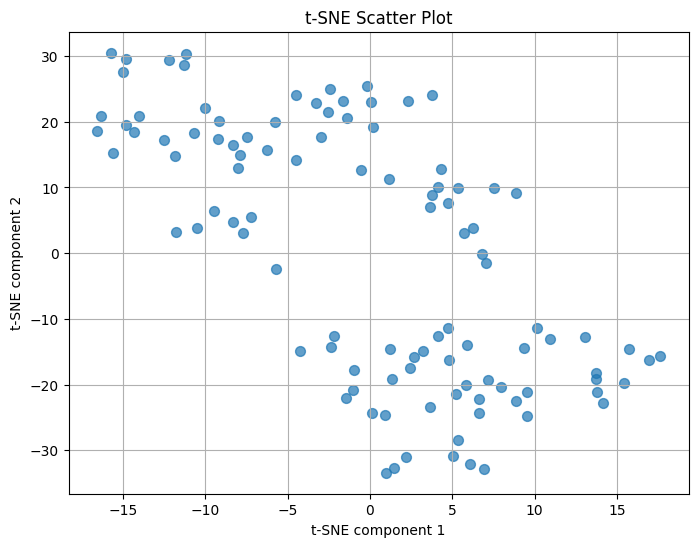

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_tSNE[:, 0], df_tSNE[:, 1], s=50, alpha=0.7)
plt.title('t-SNE Scatter Plot')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.grid(True)
plt.show()

## Porównanie dla wyników ze wszystkimi cechami PCA

W tSNE dla 75 cech nie widać dobrych klustrów. Pierwotnie mamy kilkadziesiąt tysięcy kolumn, nawet jeśli zmniejszymy ich liczbę do 100 a nie 60, będziemy mieli ogroomną redukcję wymiaru. Chcemy sprawdzić czy 10% więcej wariancji ma wpływ na klastry (w TSNE).

Number of features PCA:  104


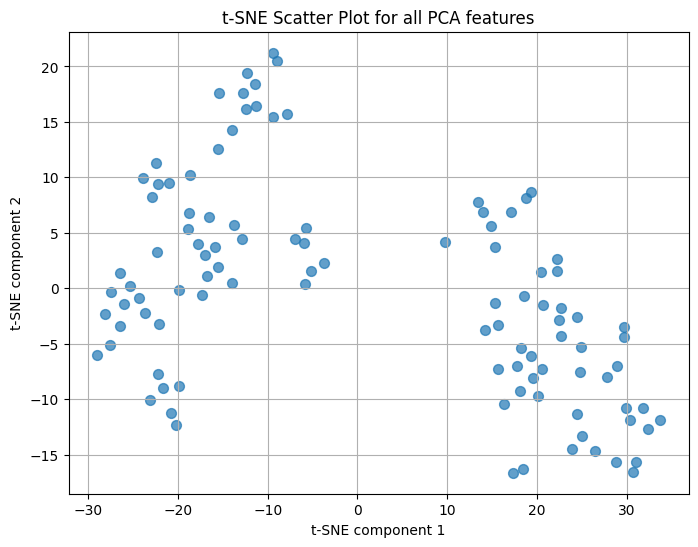

In [15]:
import matplotlib.pyplot as plt


pca_all = PCA(random_state=42).fit(df_scaled)
df_transformed_all = pca_all.transform(df_scaled)

df_tSNE_all = TSNE(n_components=2, perplexity=10, random_state=12).fit_transform(df_transformed_all)

print("Number of features PCA: ", df_transformed_all.shape[1])

plt.figure(figsize=(8, 6))
plt.scatter(df_tSNE_all[:, 0], df_tSNE_all[:, 1], s=50, alpha=0.7)
plt.title('t-SNE Scatter Plot for all PCA features')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.grid(True)
plt.show()

Dodatkowe cechy nie poprawiają wyników, zostajemy przy 75.

# Klasteryzacja

## K Means

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=12, n_init="auto").fit(df_pca)

In [17]:
def optimal_kmeans_wcss(df, k_max):
    scores = []

    #WCSS (inertia) - within-cluster sum of squares
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=12)
        kmeans.fit(df)
        wcss = kmeans.score(df) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

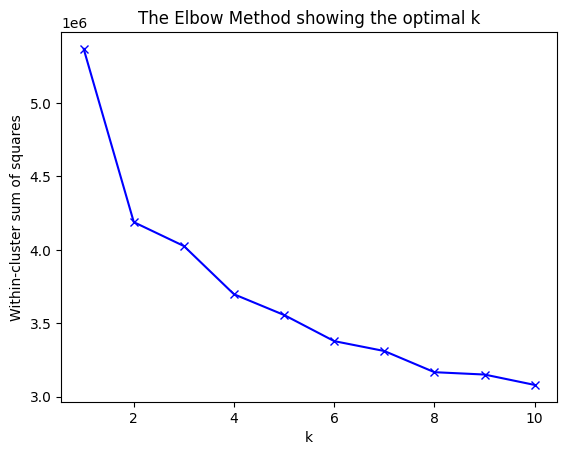

In [18]:
wcss_vec = optimal_kmeans_wcss(df_pca, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Wynik z metody łokcia jest nieoczywisty, próbujemy z silhouette score

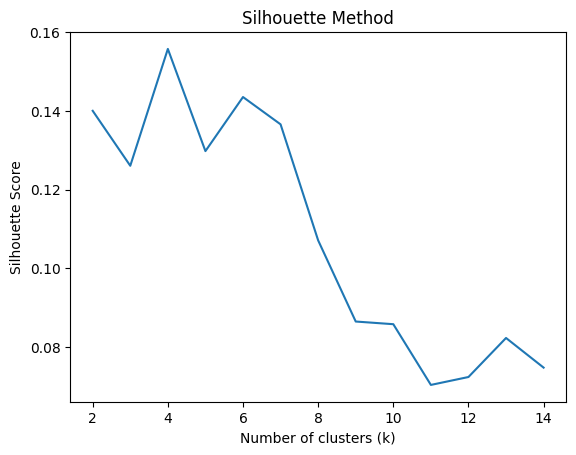

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=12).fit(df_pca)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 15), silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

Wizualizacja klastrow (używając TSNE)

In [20]:
def visualise_clusters_tSNE(df_tSNE, cluster_labels, model_name):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
    x=df_tSNE[:, 0], y=df_tSNE[:, 1],
    hue=cluster_labels,
    palette='tab10', 
    legend='full'
    )
    plt.title(model_name + ' Clusters visualized with t-SNE')
    plt.show()

Dla 4 klastrów:

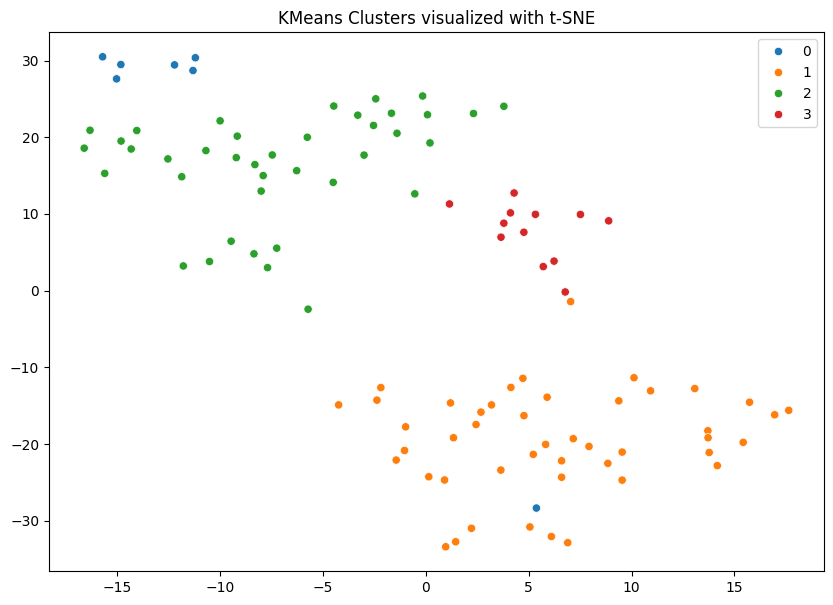

In [21]:
kmeans = KMeans(n_clusters=4, random_state=12)
cluster_labels = kmeans.fit_predict(df_pca)

visualise_clusters_tSNE(df_tSNE, cluster_labels, "KMeans")

Dla 6 klastrów:

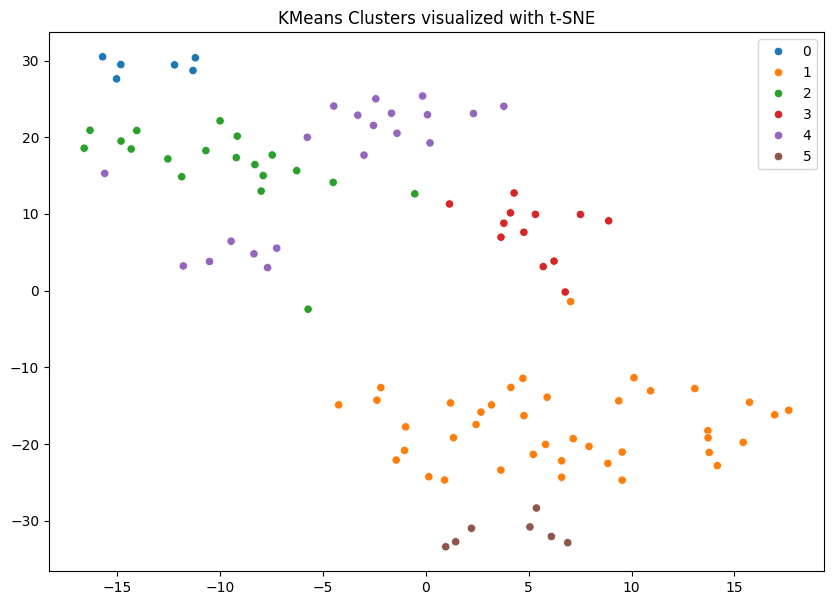

In [22]:
kmeans = KMeans(n_clusters=6, random_state=12)
cluster_labels = kmeans.fit_predict(df_pca)

visualise_clusters_tSNE(df_tSNE, cluster_labels, "KMeans")

## Hierarchical

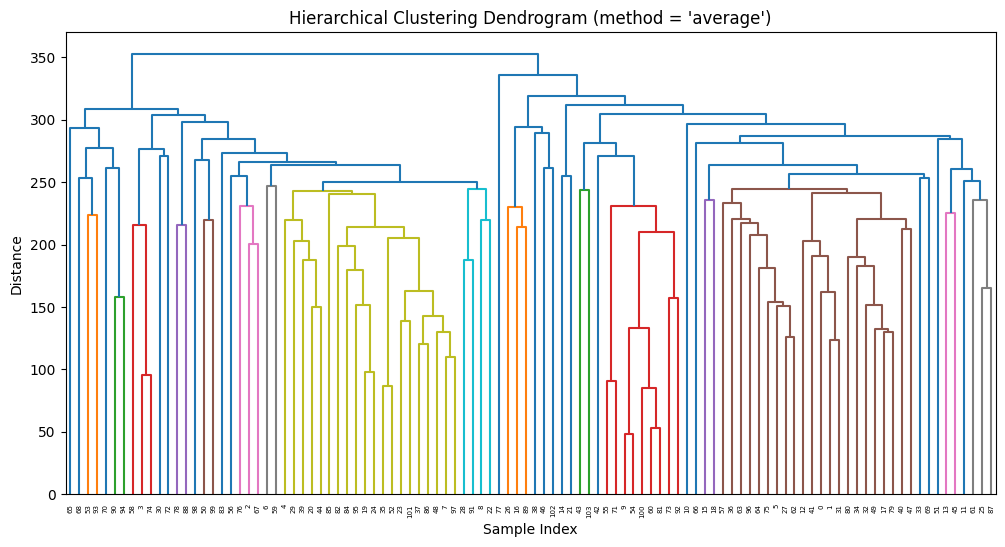

In [23]:
import scipy.cluster.hierarchy as sch

linkage_matrix = sch.linkage(df_pca, method='average')

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (method = 'average')")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

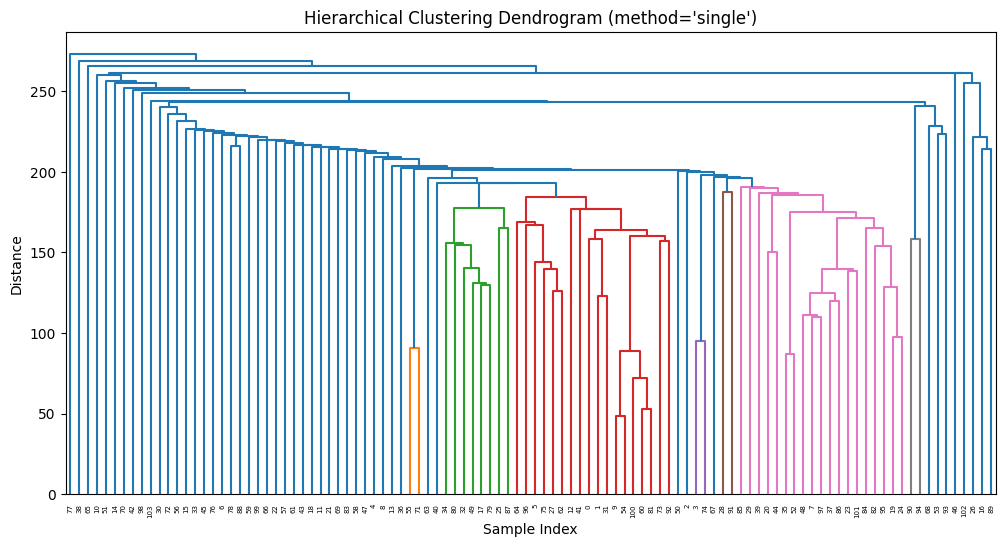

In [24]:
linkage_matrix = sch.linkage(df_pca, method='single')

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (method='single')")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

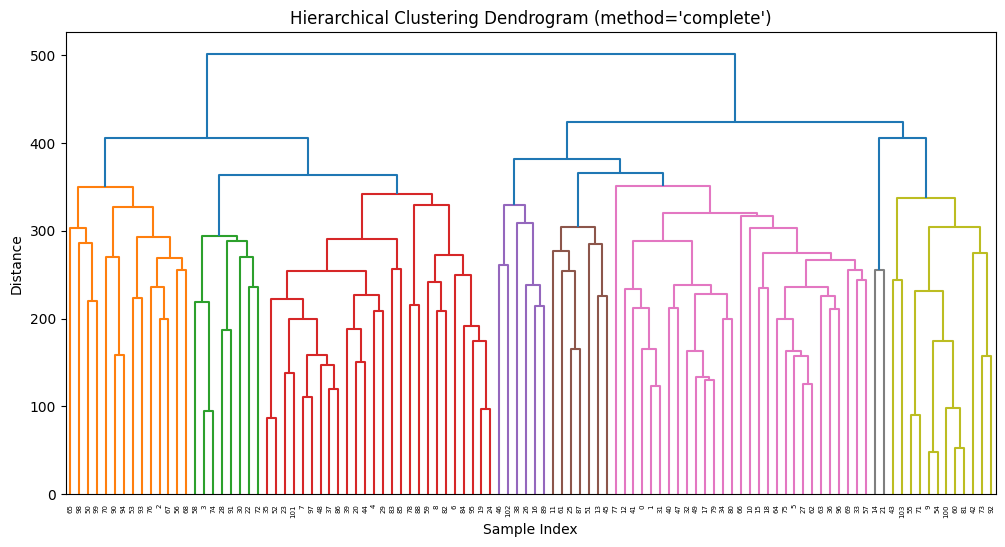

In [25]:
linkage_matrix = sch.linkage(df_pca, method='complete')

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (method='complete')")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

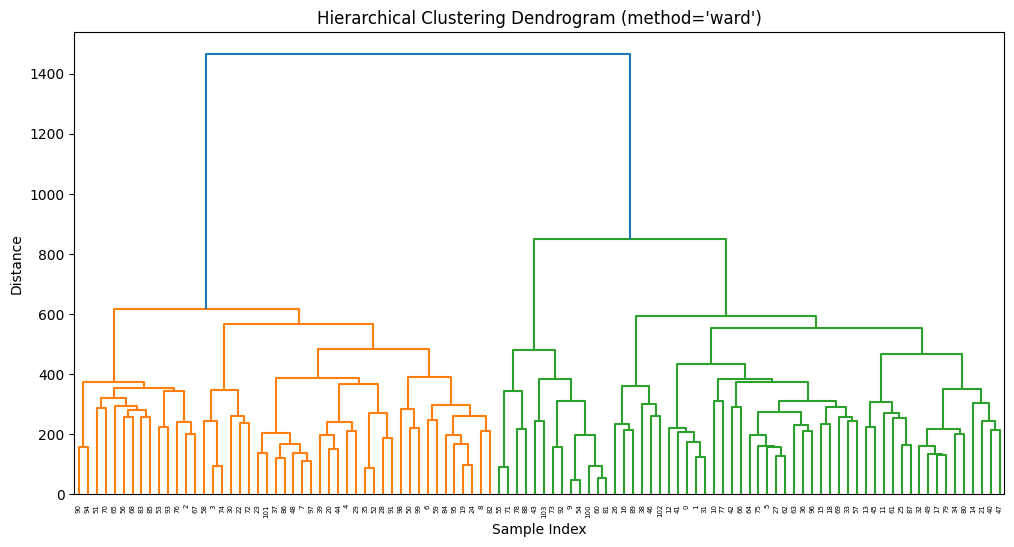

In [26]:
linkage_matrix = sch.linkage(df_pca, method='ward')

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (method='ward')")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

Ilość klastrów wybieramy na podstawie tego, gdzie na dendrogrami występuje największy (pionowy) skok -- w tym miejscu łączą się najbardzeij różne od siebie klastry.

In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.base import clone

from scipy.spatial.distance import cdist


def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []

    for i in unique_clusters:
        Xi = X[labels == i]
        intra_dists = cdist(Xi, Xi)
        intra_cluster_distances.append(np.max(intra_dists))

        for j in unique_clusters:
            if i < j:
                Xj = X[labels == j]
                inter_dists = cdist(Xi, Xj)
                inter_cluster_distances.append(np.min(inter_dists))

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

def evaluate_models(X, models):
    """
    Parameters:
    - X: array-like, shape (n_samples, n_features)
    - models: dict of {name: clustering_model} (must have `.fit_predict()` method)

    Returns:
    - DataFrame with model evaluation metrics
    """
    results = []

    for name, model in models.items():
        clusterer = clone(model)
        labels = clusterer.fit_predict(X)

        silhouette = silhouette_score(X, labels)
        db_index = davies_bouldin_score(X, labels)
        dunn = dunn_index(X, labels)

        results.append({
            'Model': name,
            'Silhouette Score': silhouette,
            'Davies-Bouldin Index': db_index,
            'Dunn Index': dunn,
            'Num Clusters': len(np.unique(labels))
        })

    return pd.DataFrame(results).sort_values(by='Silhouette Score', ascending=False)

Metryki wybrane na podstawie: 
[Cluster validation techniques for genome expression data, Bolshakova and Azuaje, 2003](https://www.scss.tcd.ie/publications/tech-reports/reports.02/TCD-CS-2002-33.pdf)  

### DBSCAN

In [35]:
df_pca.shape

(104, 75)

Ze względu na wysoki wymiar danych (już po redukcji wymiaru), trudno jest dostroić parametry dla modelu DBSCAN. Zalecona wartość min_samples = 2*wymiar danych daje u nas 150. n_samples = 104 nie daje sensownych wyników, tak samo jak sztucznie wybrane małe k=5. Użycie DBSCAN na bardziej zredukowanych danych (do 10 cech) także nie daje dobrych wyników. 

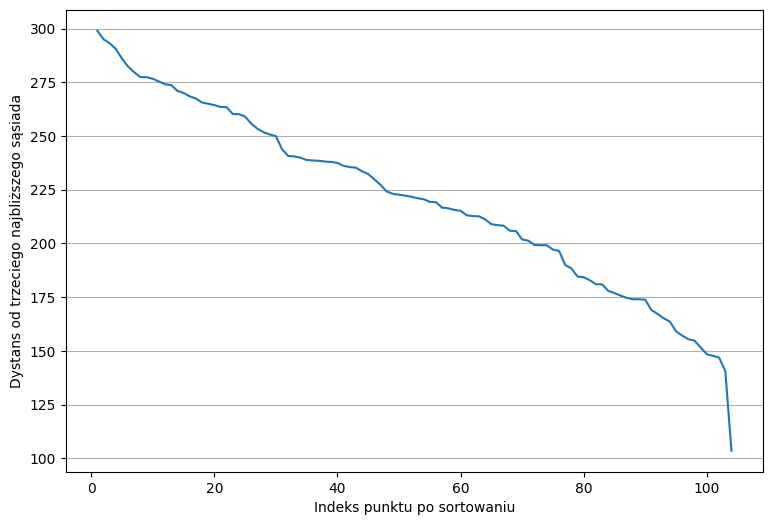

In [29]:
from sklearn.neighbors import NearestNeighbors


minPts = 5
nbrs = NearestNeighbors(n_neighbors=minPts).fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel('Dystans od trzeciego najbliższego sąsiada')
ax1.plot(list(range(1,df_pca.shape[0]+1)), distanceDec)

plt.grid(axis='y')

plt.show()

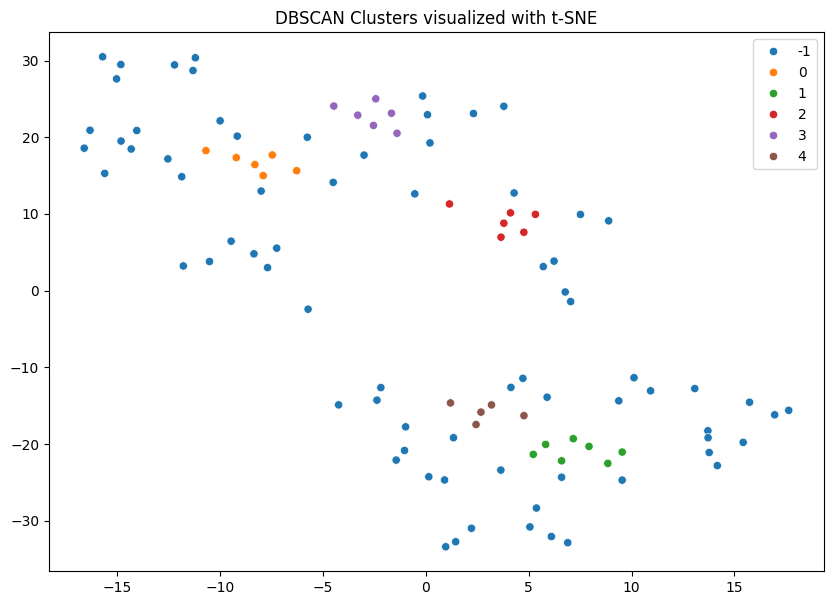

In [30]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(min_samples=5, eps=170)
cluster_labels = dbscan.fit_predict(df_pca)

visualise_clusters_tSNE(df_tSNE, cluster_labels, "DBSCAN")

In [31]:
df_pca_10 = PCA(n_components=75, random_state=12).fit(df_scaled).transform(df_scaled)

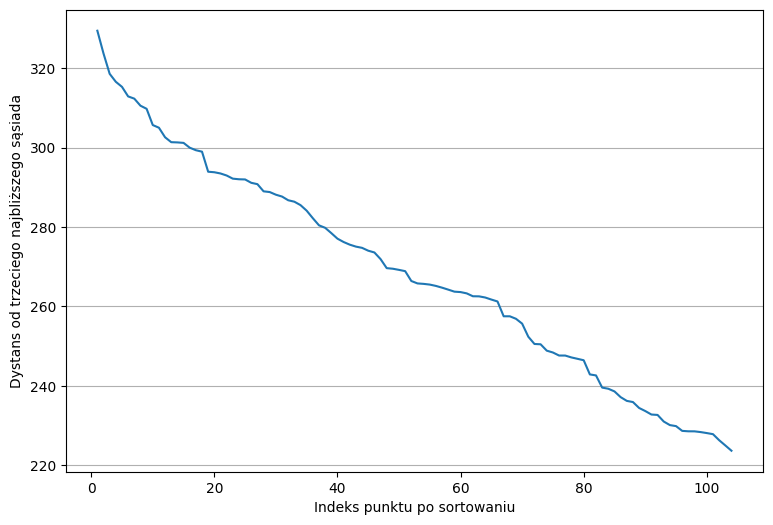

In [32]:
from sklearn.neighbors import NearestNeighbors


minPts = 20
nbrs = NearestNeighbors(n_neighbors=minPts).fit(df_pca_10)
distances, indices = nbrs.kneighbors(df_pca_10)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel('Dystans od trzeciego najbliższego sąsiada')
ax1.plot(list(range(1,df_pca_10.shape[0]+1)), distanceDec)

plt.grid(axis='y')

plt.show()

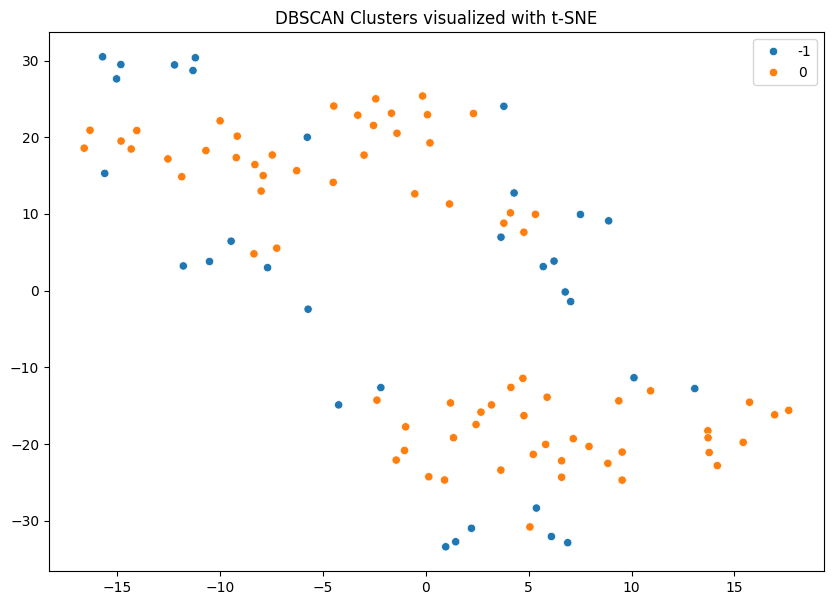

In [33]:
dbscan = DBSCAN(min_samples=20, eps=245)
cluster_labels = dbscan.fit_predict(df_pca)

visualise_clusters_tSNE(df_tSNE, cluster_labels, "DBSCAN")

### GMM: 

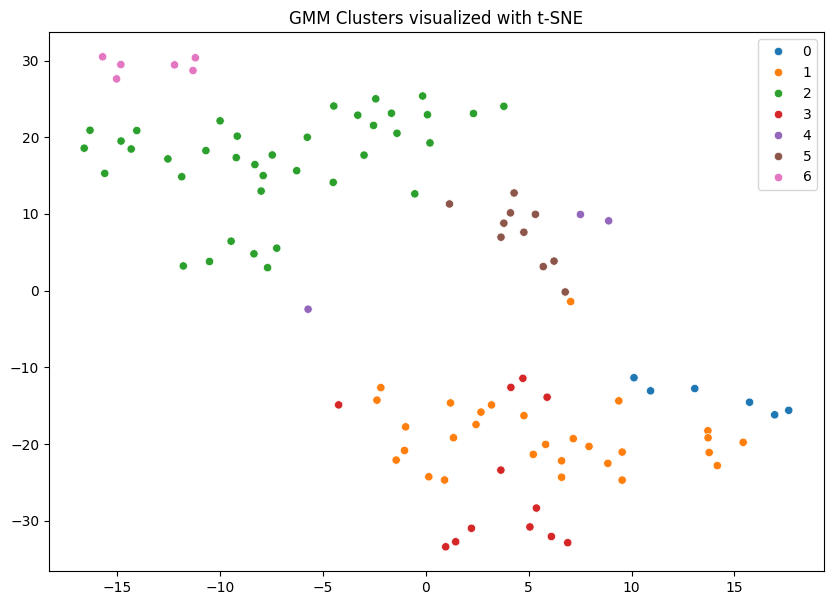

In [34]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=7)
cluster_labels = gmm.fit_predict(df_pca)

visualise_clusters_tSNE(df_tSNE, cluster_labels, "GMM")

In [36]:
from sklearn.cluster import AgglomerativeClustering


models = {
    "KMeans (k=4)": KMeans(n_clusters=4, random_state=0),
    "KMeans (k=6)": KMeans(n_clusters=6, random_state=0),
    "Aglomarative, linkage='complete, 7": AgglomerativeClustering(n_clusters=7, linkage='complete'),
    "Aglomarative, linkage='complete, 8": AgglomerativeClustering(n_clusters=8, linkage='complete'),
    "Aglomarative, linkage='ward, 5": AgglomerativeClustering(n_clusters=5, linkage='ward'),
    "Aglomarative, linkage='ward', td = 500": AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=500),
    "GMM (n_components=4)": GaussianMixture(n_components=4),
    "GMM (n_components=5)": GaussianMixture(n_components=5),
    "GMM (n_components=6)": GaussianMixture(n_components=6),
    "GMM (n_components=7)": GaussianMixture(n_components=7)
}

results_df = evaluate_models(df_pca, models)
print(results_df)

                                    Model  Silhouette Score  \
4          Aglomarative, linkage='ward, 5          0.128705   
2      Aglomarative, linkage='complete, 7          0.127728   
6                    GMM (n_components=4)          0.123061   
3      Aglomarative, linkage='complete, 8          0.120143   
8                    GMM (n_components=6)          0.112510   
0                            KMeans (k=4)          0.108515   
5  Aglomarative, linkage='ward', td = 500          0.107684   
1                            KMeans (k=6)          0.091137   
9                    GMM (n_components=7)          0.088817   
7                    GMM (n_components=5)          0.087333   

   Davies-Bouldin Index  Dunn Index  Num Clusters  
4              2.218814    0.409617             5  
2              2.090922    0.450158             7  
6              2.492516    0.416104             4  
3              2.075566    0.466790             8  
8              2.168727    0.401269           

Silhouette: 1 - dobrze sklasyfikowane, -1 -źle\
Davies-Boulding index: chcemy min.\
Dunn index: chcemy max.


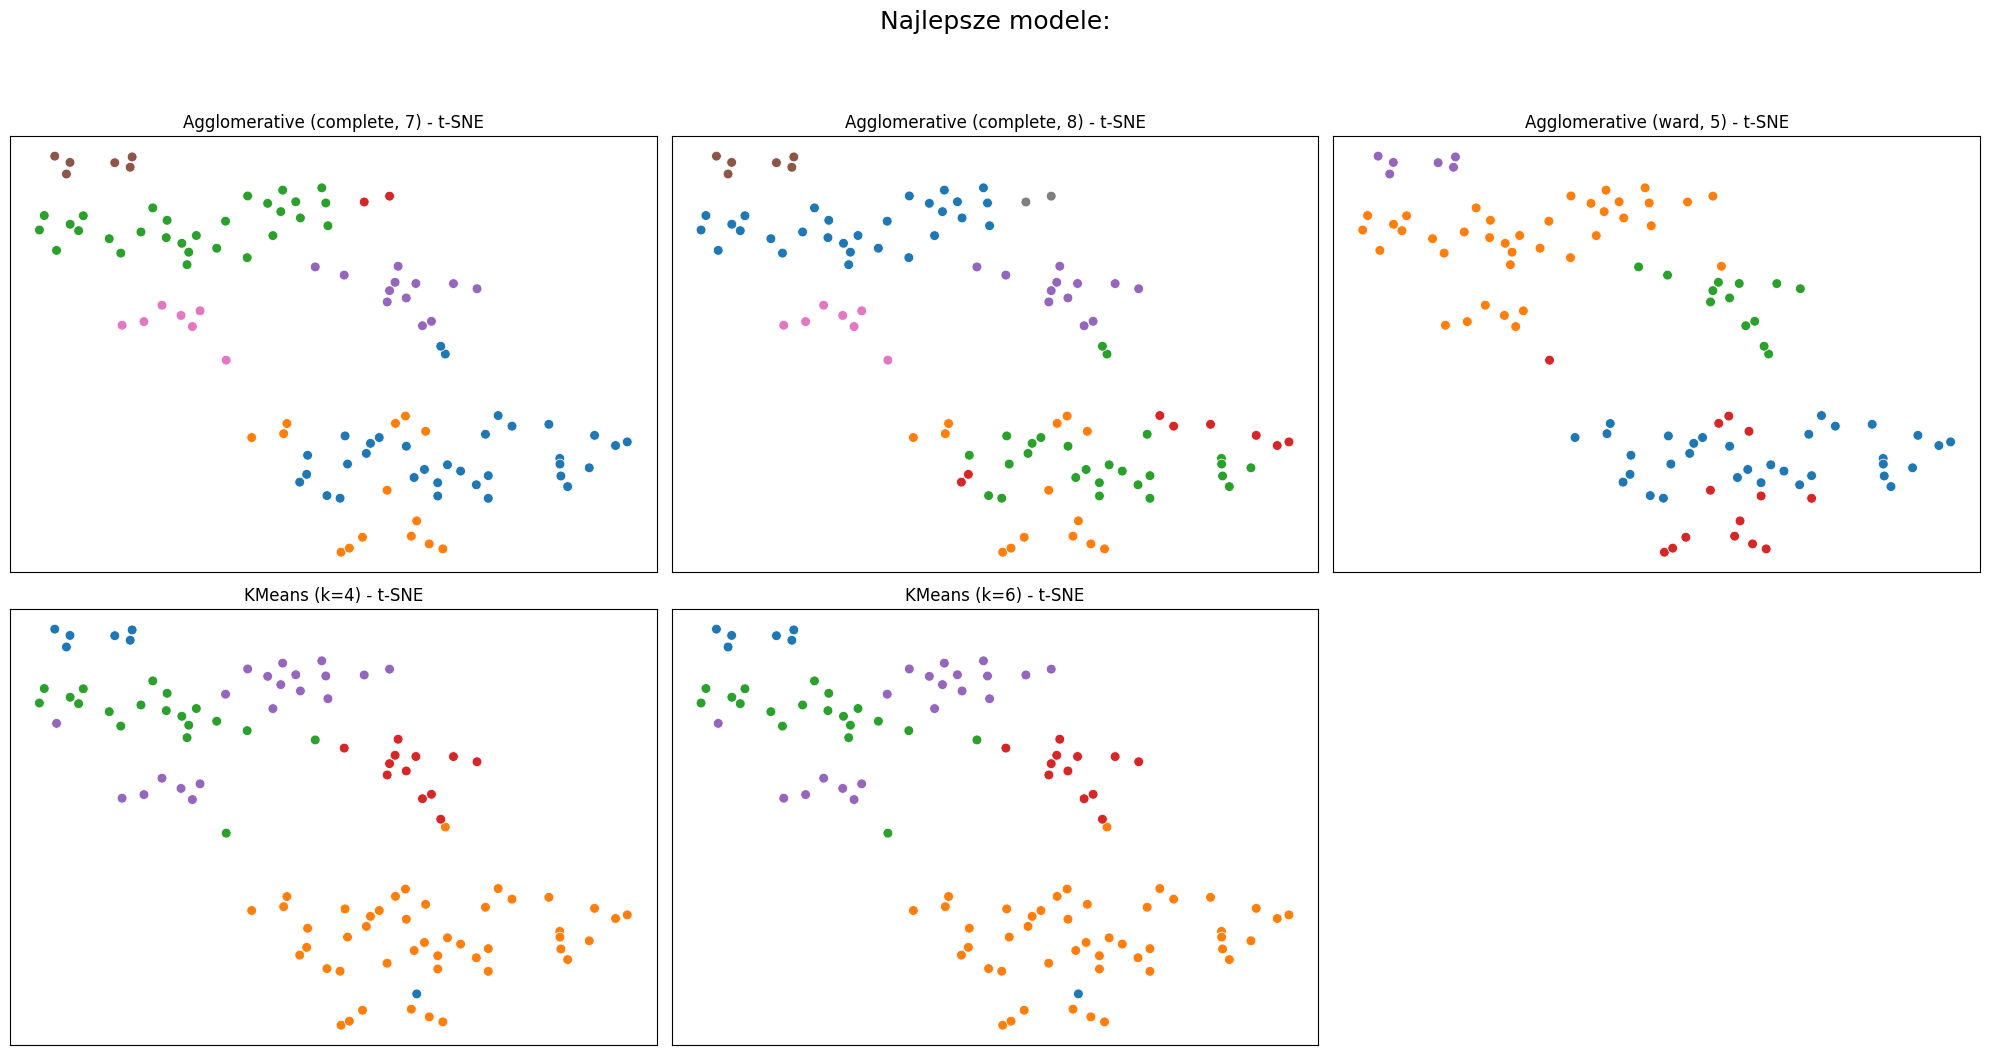

In [55]:
models = {
    "Agglomerative (complete, 7)": AgglomerativeClustering(linkage='complete', n_clusters=7),
    "Agglomerative (complete, 8)": AgglomerativeClustering(linkage='complete', n_clusters=8),
    "Agglomerative (ward, 5)": AgglomerativeClustering(linkage='ward', n_clusters=5),
    "KMeans (k=4)": KMeans(n_clusters=5, random_state=12),
    "KMeans (k=6)": KMeans(n_clusters=5,random_state=12),
}


fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()


for ax, (name, model) in zip(axes, models.items()):
    if hasattr(model, 'fit_predict'):
        labels = model.fit_predict(df_pca)

    else:
        model.fit(df_pca)
        labels = model.predict(df_pca)
    
    sns.scatterplot(
        x=df_tSNE[:, 0], y=df_tSNE[:, 1],
        hue=labels,
        palette='tab10',
        legend=None,
        ax=ax,
        s=50
    )
    ax.set_title(f"{name} - t-SNE")
    ax.set_xticks([])
    ax.set_yticks([])
for ax in axes[len(models):]:
    ax.axis('off') 
plt.suptitle("Najlepsze modele:", fontsize=18, y=1.05)
plt.tight_layout()
plt.show()